In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crashes = pd.read_csv('dataset/crashes_severity_2017.csv')
people = pd.read_csv('dataset/people_2017.csv')
vehicles = pd.read_csv('dataset/vehicles_2017.csv')

In [3]:
crashes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757867 entries, 0 to 757866
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   757867 non-null  object 
 1   CRASH_DATE                        757867 non-null  object 
 2   POSTED_SPEED_LIMIT                757867 non-null  int64  
 3   WEATHER_SEVERITY                  757867 non-null  int64  
 4   LIGHTING_SEVERITY                 757867 non-null  int64  
 5   FIRST_CRASH_TYPE                  757867 non-null  object 
 6   TRAFFICWAY_TYPE                   757867 non-null  object 
 7   ALIGNMENT                         757867 non-null  object 
 8   ROADWAY_SEVERITY                  757867 non-null  int64  
 9   CRASH_TYPE                        757867 non-null  object 
 10  DAMAGE_SEVERITY                   757867 non-null  int64  
 11  PRIM_CONTRIBUTORY_CAUSE           757867 non-null  o

In [4]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290542 entries, 0 to 1290541
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1290542 non-null  object 
 1   PERSON_TYPE            1290542 non-null  object 
 2   CRASH_RECORD_ID        1290542 non-null  object 
 3   VEHICLE_ID             1289907 non-null  float64
 4   CRASH_DATE             1290542 non-null  object 
 5   CITY                   974592 non-null   object 
 6   STATE                  963462 non-null   object 
 7   ZIPCODE                913353 non-null   object 
 8   SEX                    1290542 non-null  float64
 9   AGE                    933194 non-null   float64
 10  DRIVERS_LICENSE_STATE  970287 non-null   object 
 11  DRIVERS_LICENSE_CLASS  793192 non-null   object 
 12  INJURY_CLASSIFICATION  1290542 non-null  object 
 13  DRIVER_ACTION          1290542 non-null  object 
 14  DRIVER_VISION     

In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549470 entries, 0 to 1549469
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1549470 non-null  int64  
 1   CRASH_RECORD_ID      1549470 non-null  object 
 2   VEHICLE_ID           1511679 non-null  float64
 3   CRASH_DATE           1549470 non-null  object 
 4   UNIT_NO              1549470 non-null  int64  
 5   UNIT_TYPE            1547645 non-null  object 
 6   NUM_PASSENGERS       231740 non-null   float64
 7   VEHICLE_YEAR         1270603 non-null  float64
 8   VEHICLE_DEFECT       1511679 non-null  object 
 9   VEHICLE_TYPE         1511679 non-null  object 
 10  MANEUVER             1511679 non-null  object 
 11  OCCUPANT_CNT         1511679 non-null  float64
 12  FIRST_CONTACT_POINT  1508631 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 153.7+ MB


## Date Distribution for crashes

In [6]:
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'])

In [7]:
crashes['CRASH_YEAR'] = crashes['CRASH_DATE'].dt.year
crashes['CRASH_MONTH'] = crashes['CRASH_DATE'].dt.month
crashes['CRASH_DAY'] = crashes['CRASH_DATE'].dt.day
crashes['CRASH_HOUR'] = crashes['CRASH_DATE'].dt.hour
crashes['CRASH_DAY_OF_WEEK'] = crashes['CRASH_DATE'].dt.dayofweek

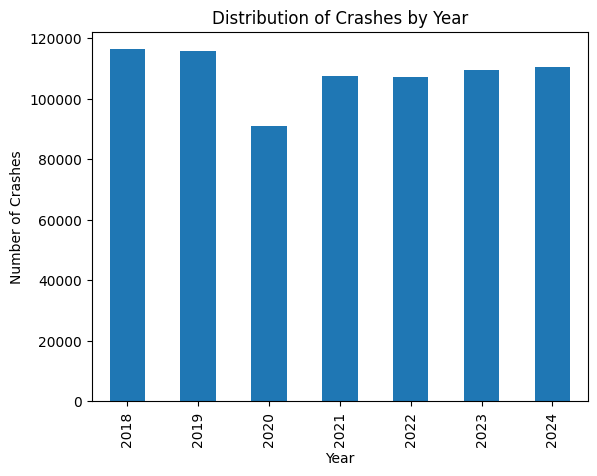

In [8]:
# distribution of crashes by year
crashes['CRASH_YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()


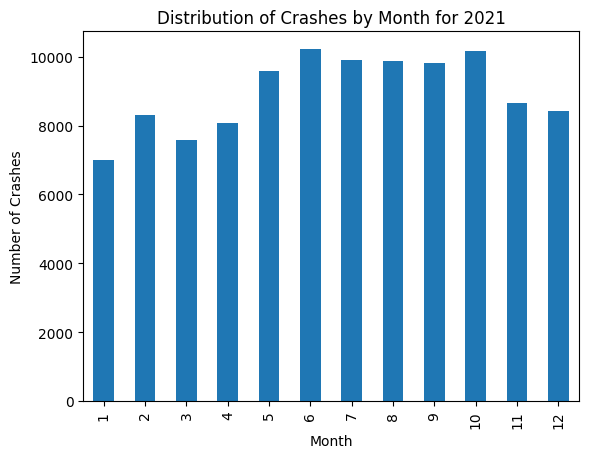

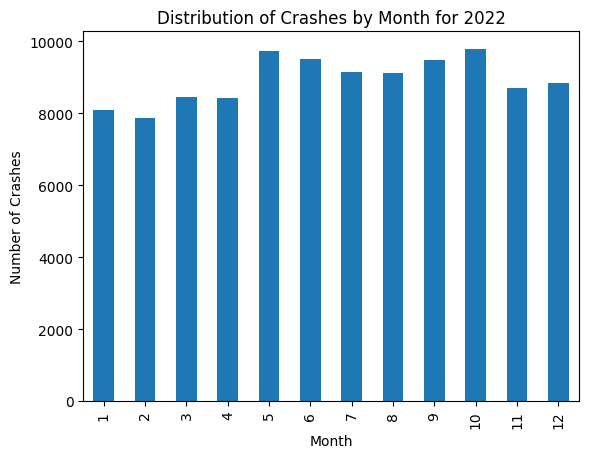

In [9]:
# filter crashes for the year 2021
crashes_2021 = crashes[crashes['CRASH_YEAR'] == 2021]

# distribution of crashes by month for 2021
crashes_2021['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Month for 2021')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()

# filter crashes for the year 2022
crashes_2021 = crashes[crashes['CRASH_YEAR'] == 2022]

# distribution of crashes by month for 2022
crashes_2021['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Month for 2022')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()


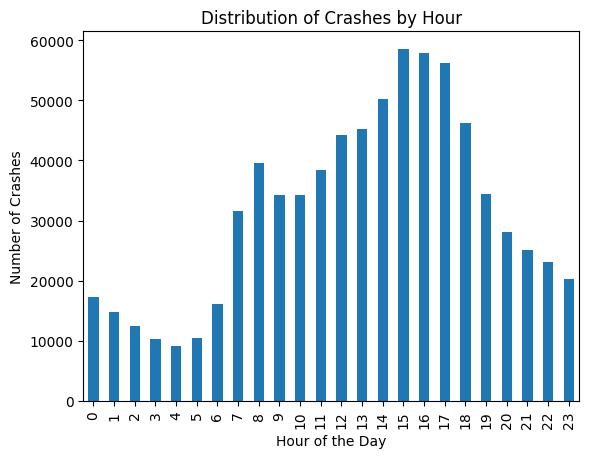

In [10]:
# Plot the distribution of crashes by hour
crashes['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

<Figure size 1400x800 with 0 Axes>

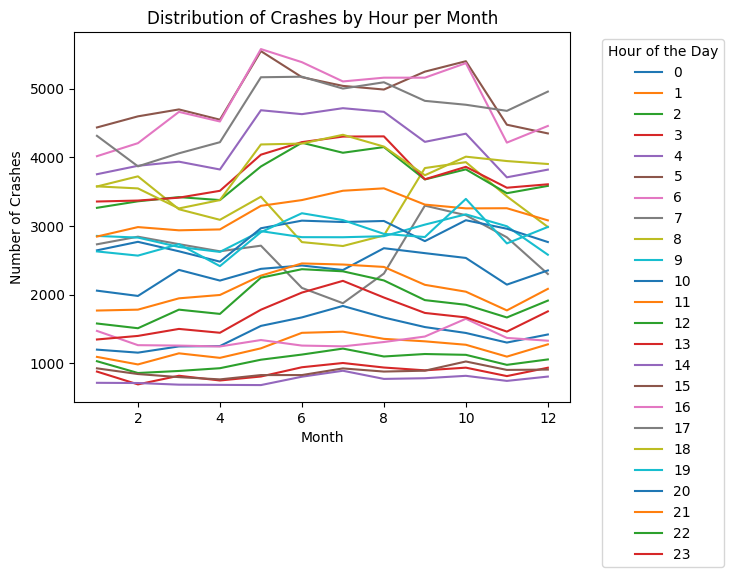

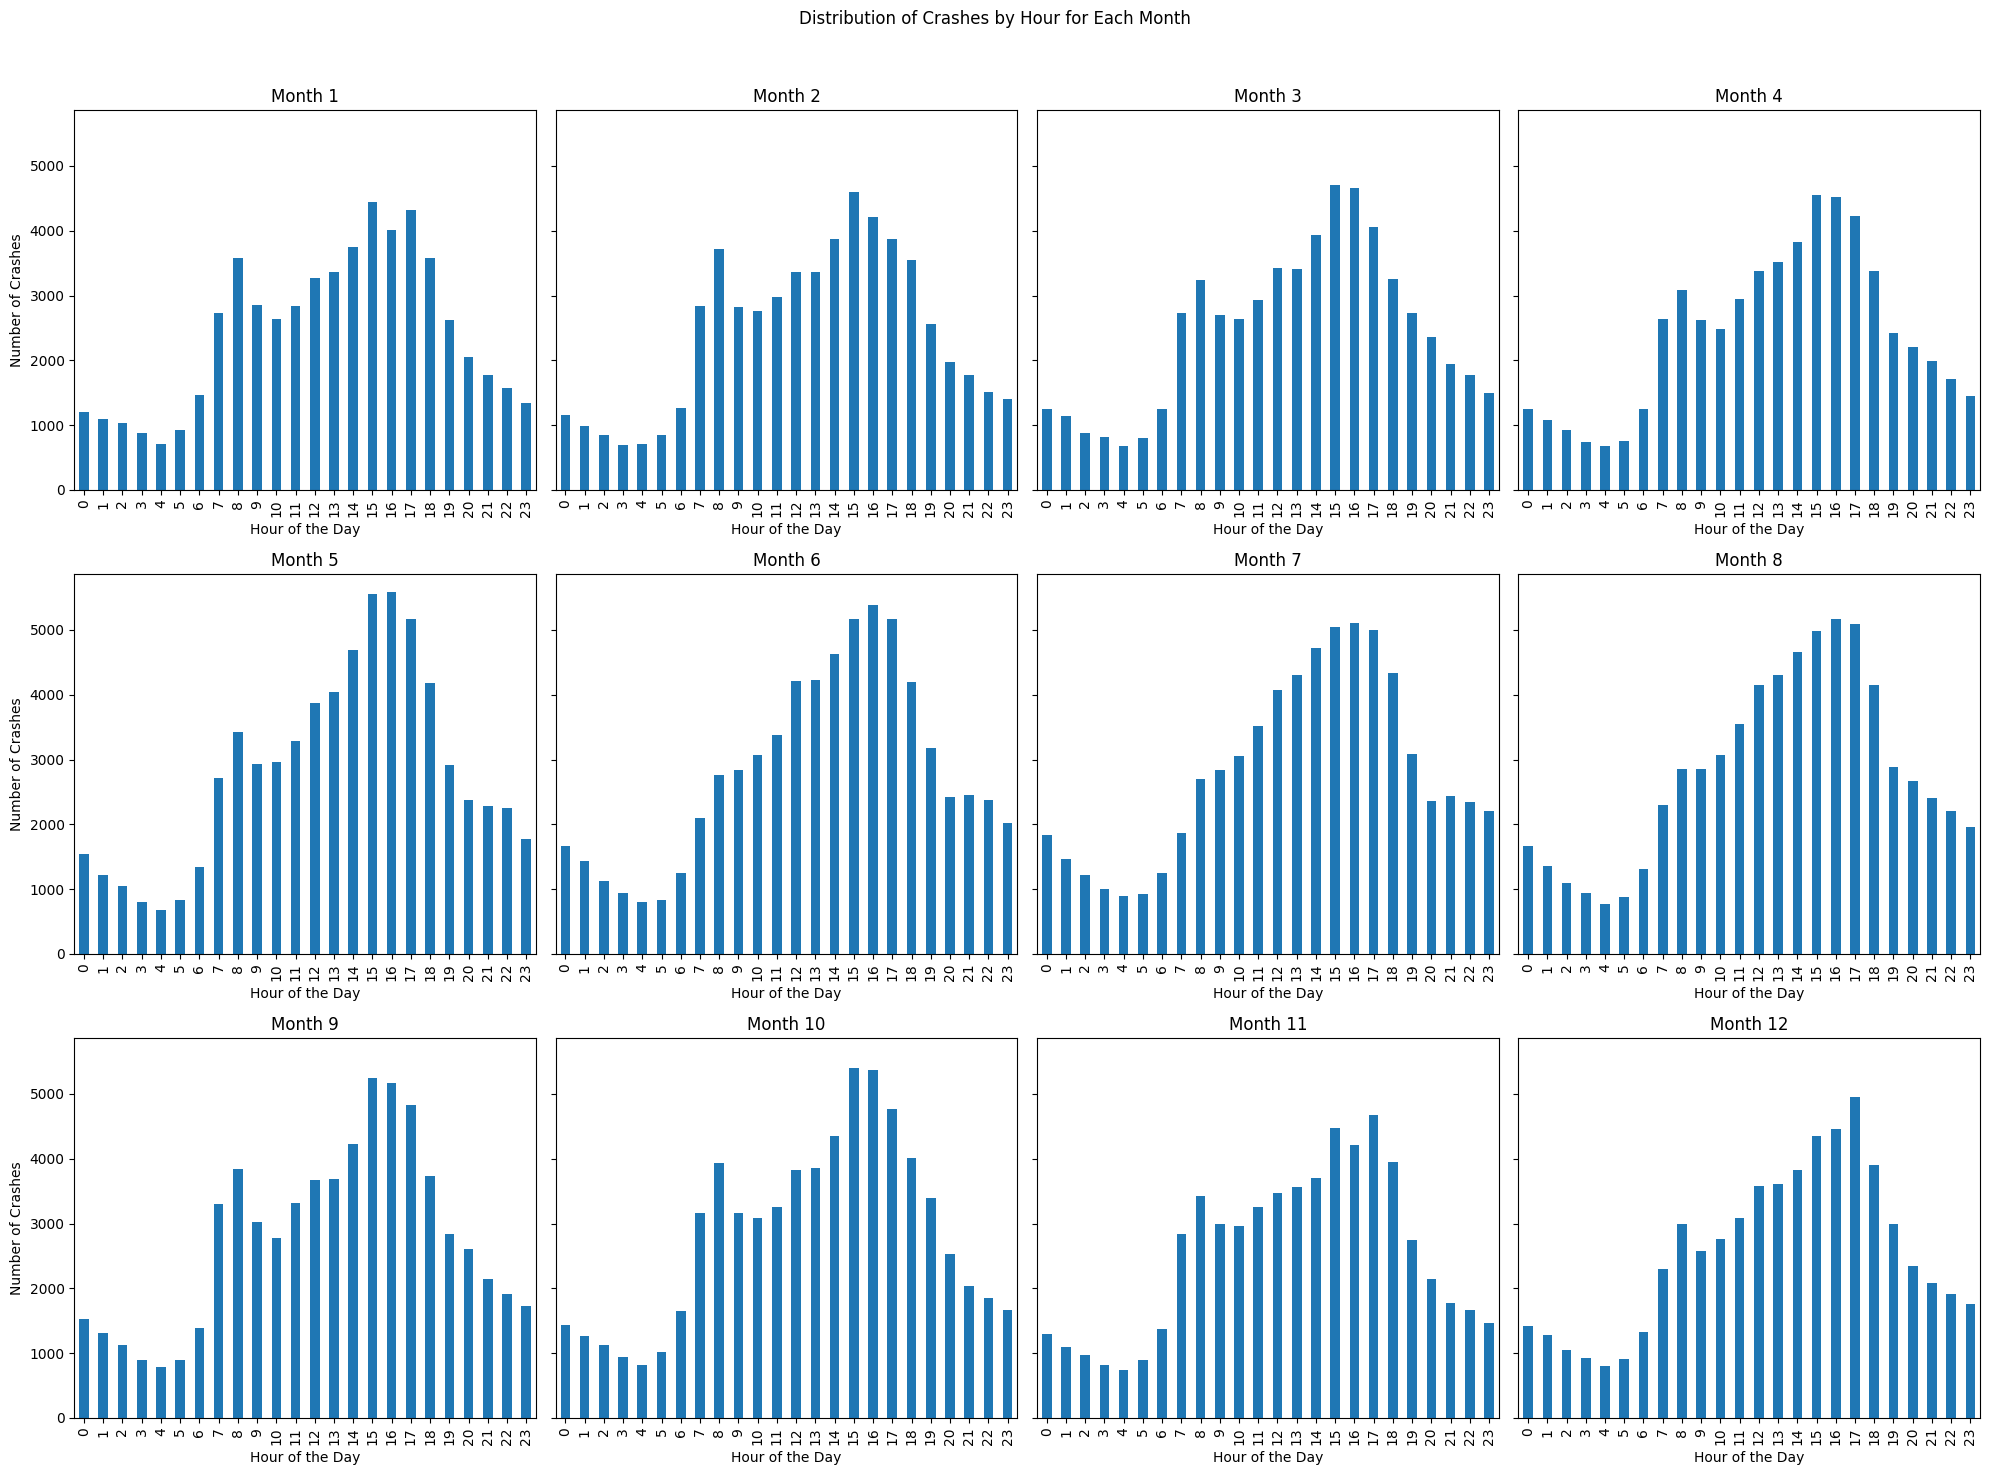

In [11]:
# distribution of crashes by hours per month
plt.figure(figsize=(14, 8))
crashes.groupby('CRASH_MONTH')['CRASH_HOUR'].value_counts().unstack().plot(kind='line', stacked=False)
plt.title('Distribution of Crashes by Hour per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the distribution of crashes by hour for each month
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
fig.suptitle('Distribution of Crashes by Hour for Each Month')

for month, ax in zip(range(1, 13), axes.flatten()):
    subset = crashes[crashes['CRASH_MONTH'] == month]
    subset['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Crashes')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

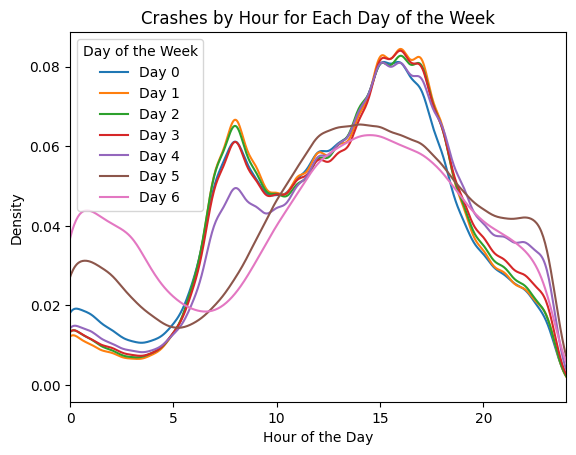

In [12]:
# Plot KDE for different days of the week
for day in range(0, 7):
    subset = crashes[crashes['CRASH_DAY_OF_WEEK'] == day]
    subset['CRASH_HOUR'].plot(kind='kde', label=f'Day {day}')

plt.title('Crashes by Hour for Each Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.legend(title='Day of the Week')
plt.show()

---

# POSTED_SPEED_LIMIT



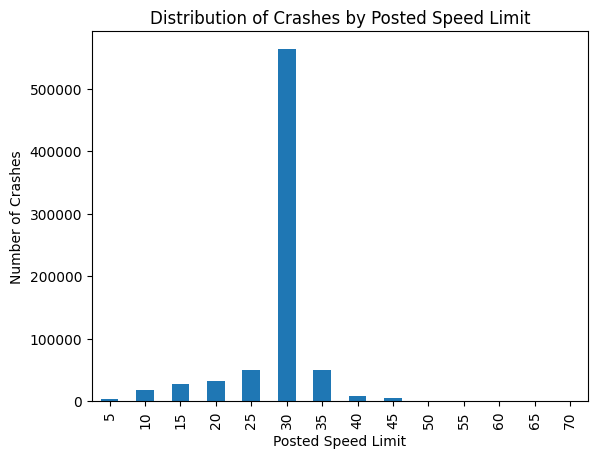

In [13]:
crashes['POSTED_SPEED_LIMIT'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Posted Speed Limit')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Crashes')
plt.show()


In [14]:
# POSTED_SPEED_LIMIT value counts
crashes['POSTED_SPEED_LIMIT'].value_counts().sort_index()

POSTED_SPEED_LIMIT
5       3538
10     18309
15     27313
20     32122
25     49684
30    563279
35     50354
40      7450
45      4945
50       236
55       588
60        33
65        10
70         6
Name: count, dtype: int64

---

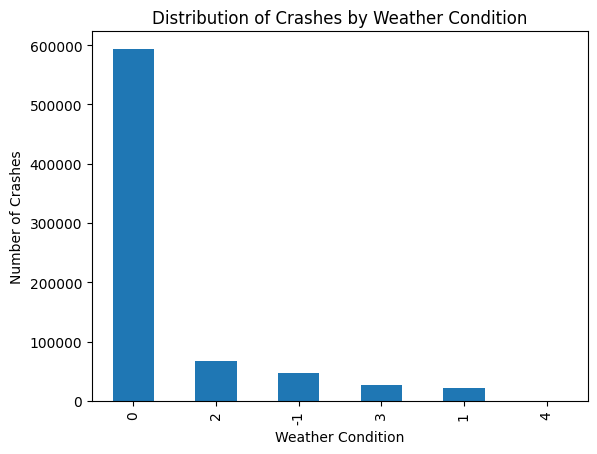

In [15]:
# weather severity distribution
crashes['WEATHER_SEVERITY'].value_counts().plot(kind='bar')
plt.title('Distribution of Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.show()

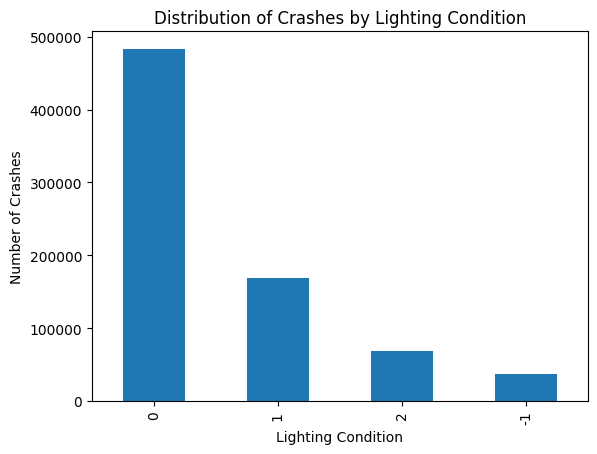

In [16]:
crashes['LIGHTING_SEVERITY'].value_counts().plot(kind='bar')
plt.title('Distribution of Crashes by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Crashes')
plt.show()

<Axes: xlabel='FIRST_CRASH_TYPE'>

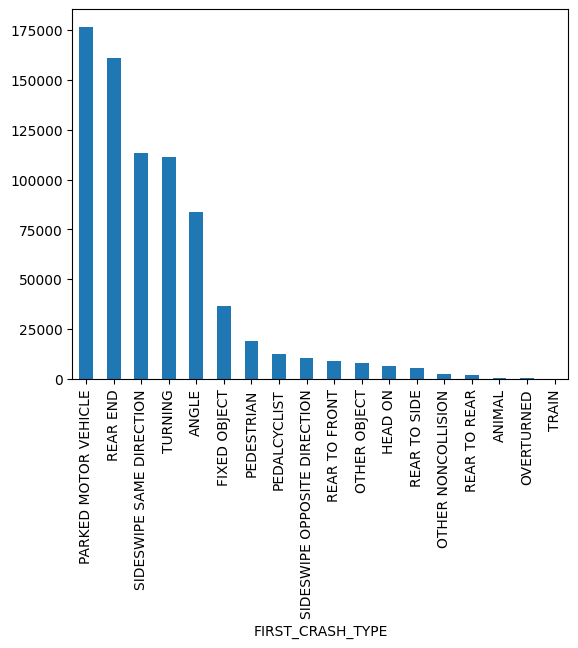

In [17]:
crashes['FIRST_CRASH_TYPE'].value_counts().plot(kind='bar')

<Axes: xlabel='TRAFFICWAY_TYPE'>

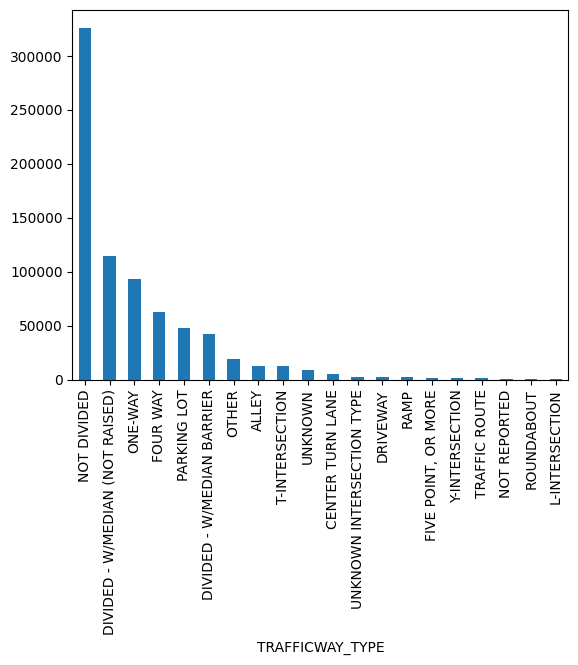

In [18]:
crashes['TRAFFICWAY_TYPE'].value_counts().plot(kind='bar')

<Axes: xlabel='ALIGNMENT'>

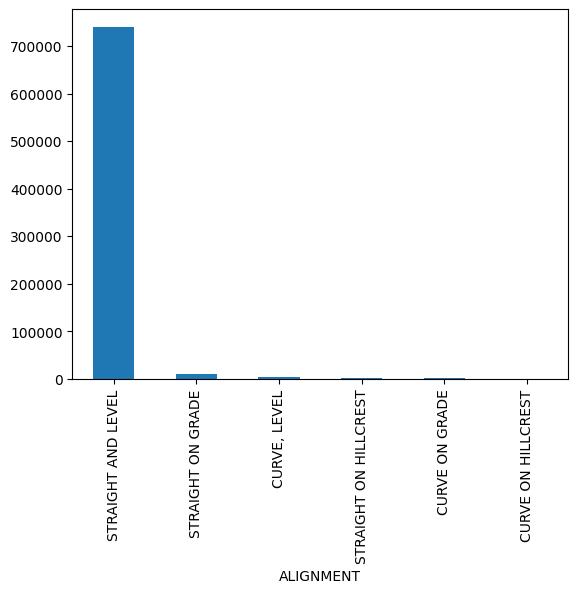

In [19]:
crashes['ALIGNMENT'].value_counts().plot(kind='bar')

we can drop this row due to the high unbalanced distribution

In [20]:
crashes.drop(columns=['ALIGNMENT'], inplace=True)

<Axes: xlabel='ROADWAY_SEVERITY'>

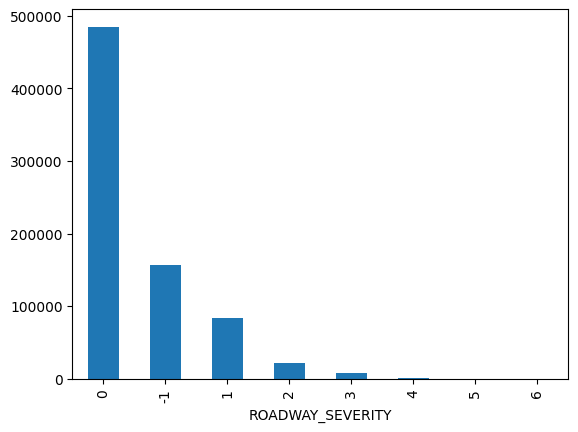

In [21]:
crashes['ROADWAY_SEVERITY'].value_counts().plot(kind='bar')

<Axes: xlabel='DAMAGE_SEVERITY'>

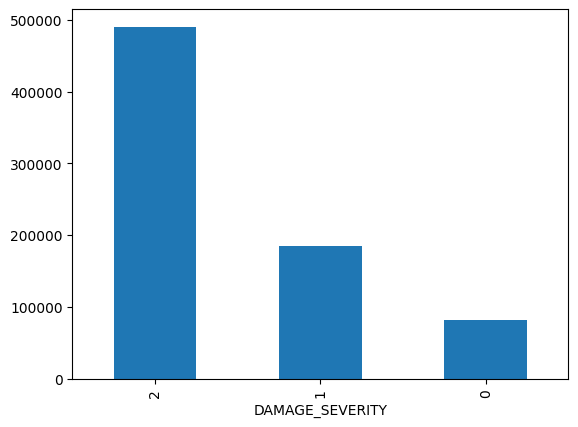

In [22]:
crashes['DAMAGE_SEVERITY'].value_counts().plot(kind='bar')

---

## NUM_UNITS

<Axes: xlabel='NUM_UNITS'>

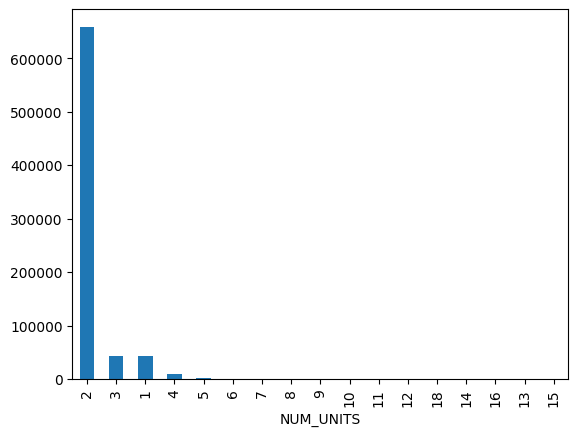

In [23]:
crashes['NUM_UNITS'].value_counts().plot(kind='bar')


<Axes: xlabel='INJURIES_TOTAL'>

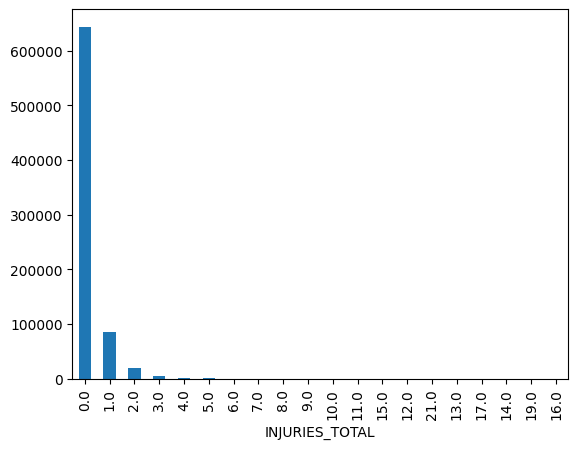

In [24]:
crashes['INJURIES_TOTAL'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_FATAL'>

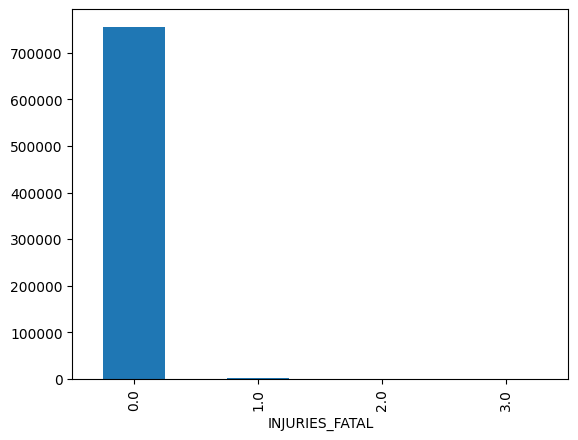

In [25]:
crashes['INJURIES_FATAL'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_INCAPACITATING'>

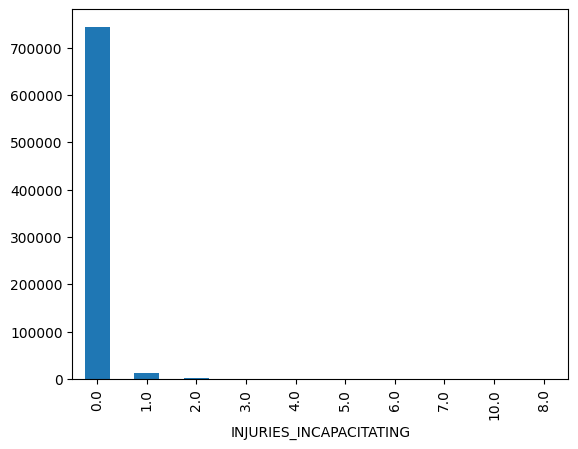

In [26]:
crashes['INJURIES_INCAPACITATING'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_NON_INCAPACITATING'>

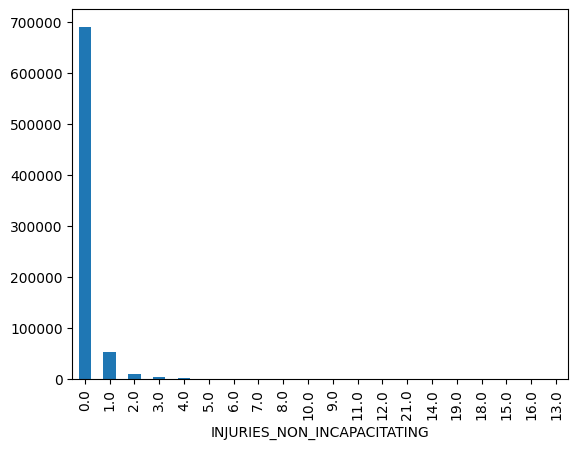

In [27]:
crashes['INJURIES_NON_INCAPACITATING'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_REPORTED_NOT_EVIDENT'>

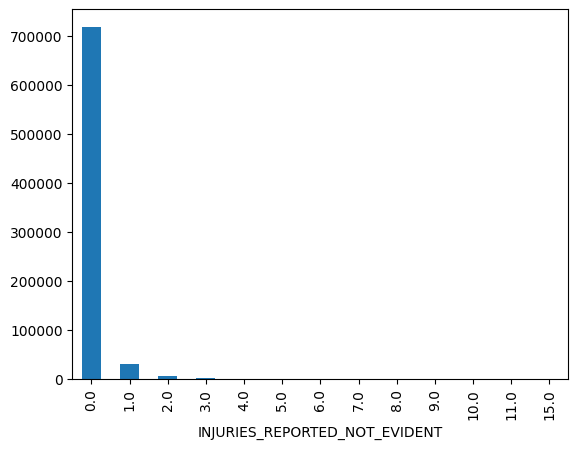

In [28]:
crashes['INJURIES_REPORTED_NOT_EVIDENT'].value_counts().plot(kind='bar')

---

# People Dataset

In [29]:
# people dataset
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290542 entries, 0 to 1290541
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1290542 non-null  object 
 1   PERSON_TYPE            1290542 non-null  object 
 2   CRASH_RECORD_ID        1290542 non-null  object 
 3   VEHICLE_ID             1289907 non-null  float64
 4   CRASH_DATE             1290542 non-null  object 
 5   CITY                   974592 non-null   object 
 6   STATE                  963462 non-null   object 
 7   ZIPCODE                913353 non-null   object 
 8   SEX                    1290542 non-null  float64
 9   AGE                    933194 non-null   float64
 10  DRIVERS_LICENSE_STATE  970287 non-null   object 
 11  DRIVERS_LICENSE_CLASS  793192 non-null   object 
 12  INJURY_CLASSIFICATION  1290542 non-null  object 
 13  DRIVER_ACTION          1290542 non-null  object 
 14  DRIVER_VISION     

In [30]:
people = people[people['CRASH_RECORD_ID'].isin(crashes['CRASH_RECORD_ID'])]

In [31]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290542 entries, 0 to 1290541
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1290542 non-null  object 
 1   PERSON_TYPE            1290542 non-null  object 
 2   CRASH_RECORD_ID        1290542 non-null  object 
 3   VEHICLE_ID             1289907 non-null  float64
 4   CRASH_DATE             1290542 non-null  object 
 5   CITY                   974592 non-null   object 
 6   STATE                  963462 non-null   object 
 7   ZIPCODE                913353 non-null   object 
 8   SEX                    1290542 non-null  float64
 9   AGE                    933194 non-null   float64
 10  DRIVERS_LICENSE_STATE  970287 non-null   object 
 11  DRIVERS_LICENSE_CLASS  793192 non-null   object 
 12  INJURY_CLASSIFICATION  1290542 non-null  object 
 13  DRIVER_ACTION          1290542 non-null  object 
 14  DRIVER_VISION     

In [32]:
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,EJECTION/AIRBAG,SPEEDING,DRINKING,TELEPHONE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,2019-09-28 03:30:00,CHICAGO,IL,60651,1.0,25.0,IL,D,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,0.0,False,False,False
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,2020-04-13 22:50:00,CHICAGO,IL,60620,1.0,37.0,IL,NaN,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,0.0,False,False,False
2,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805348.0,2020-02-23 18:15:00,CHICAGO,IL,60625,0.0,34.0,IL,D,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL,0.0,False,False,False
3,O877654,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,832624.0,2020-04-30 15:05:00,CHICAGO,IL,60620,1.0,53.0,IL,B,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL,0.0,False,False,False
4,O879085,DRIVER,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,833984.0,2020-05-03 22:30:00,CALUMENT CITY,NaN,NaN,1.0,65.0,IL,D,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL,0.0,False,False,False


---

## Age

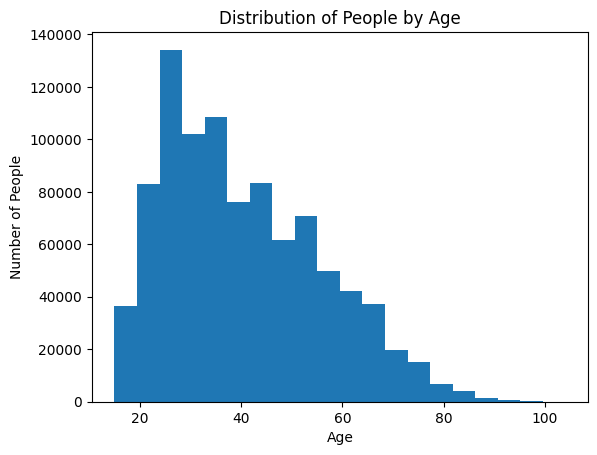

In [33]:
# age distribution
people['AGE'].plot(kind='hist', bins=20)
plt.title('Distribution of People by Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

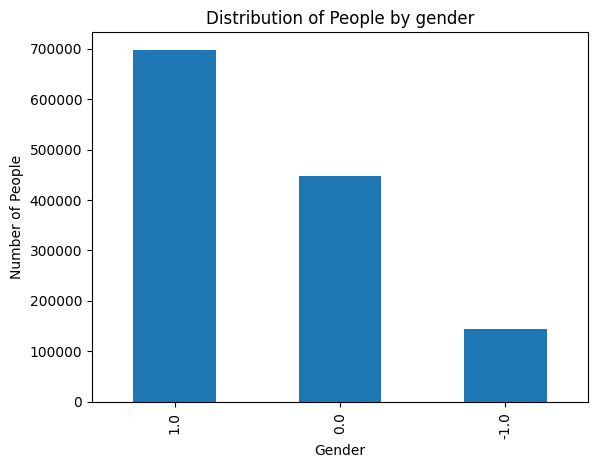

In [34]:
# SEX distributio

people['SEX'].value_counts().plot(kind='bar')
plt.title('Distribution of People by gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()

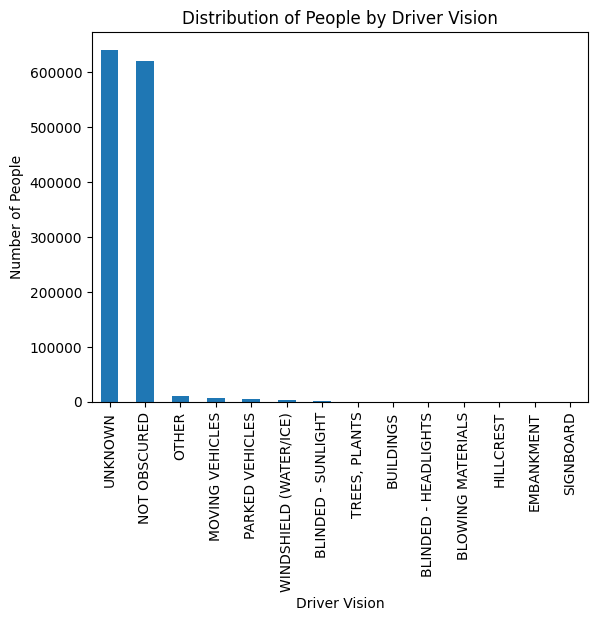

In [35]:
people['DRIVER_VISION'].value_counts().plot(kind='bar')
plt.title('Distribution of People by Driver Vision')
plt.xlabel('Driver Vision')
plt.ylabel('Number of People')
plt.show()


<Axes: xlabel='PHYSICAL_CONDITION'>

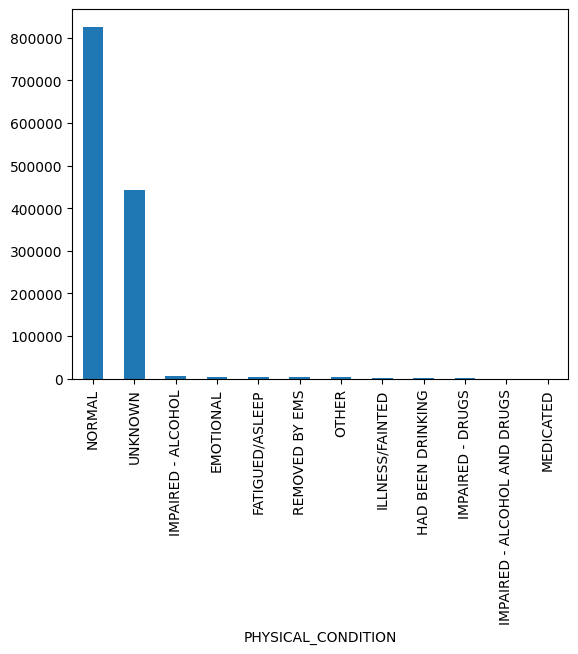

In [36]:
# PHYSICAL_CONDITION
people['PHYSICAL_CONDITION'].value_counts().plot(kind='bar')

---

# VEHICLES

In [37]:
# vehicles
vehicles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549470 entries, 0 to 1549469
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1549470 non-null  int64  
 1   CRASH_RECORD_ID      1549470 non-null  object 
 2   VEHICLE_ID           1511679 non-null  float64
 3   CRASH_DATE           1549470 non-null  object 
 4   UNIT_NO              1549470 non-null  int64  
 5   UNIT_TYPE            1547645 non-null  object 
 6   NUM_PASSENGERS       231740 non-null   float64
 7   VEHICLE_YEAR         1270603 non-null  float64
 8   VEHICLE_DEFECT       1511679 non-null  object 
 9   VEHICLE_TYPE         1511679 non-null  object 
 10  MANEUVER             1511679 non-null  object 
 11  OCCUPANT_CNT         1511679 non-null  float64
 12  FIRST_CONTACT_POINT  1508631 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 153.7+ MB


In [38]:
# keep only the vehicles that are involved in the crashes

vehicles = vehicles[vehicles['CRASH_RECORD_ID'].isin(crashes['CRASH_RECORD_ID'])]



In [39]:
vehicles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1548112 entries, 0 to 1549469
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1548112 non-null  int64  
 1   CRASH_RECORD_ID      1548112 non-null  object 
 2   VEHICLE_ID           1510348 non-null  float64
 3   CRASH_DATE           1548112 non-null  object 
 4   UNIT_NO              1548112 non-null  int64  
 5   UNIT_TYPE            1546287 non-null  object 
 6   NUM_PASSENGERS       231491 non-null   float64
 7   VEHICLE_YEAR         1269407 non-null  float64
 8   VEHICLE_DEFECT       1510348 non-null  object 
 9   VEHICLE_TYPE         1510348 non-null  object 
 10  MANEUVER             1510348 non-null  object 
 11  OCCUPANT_CNT         1510348 non-null  float64
 12  FIRST_CONTACT_POINT  1507309 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 165.4+ MB


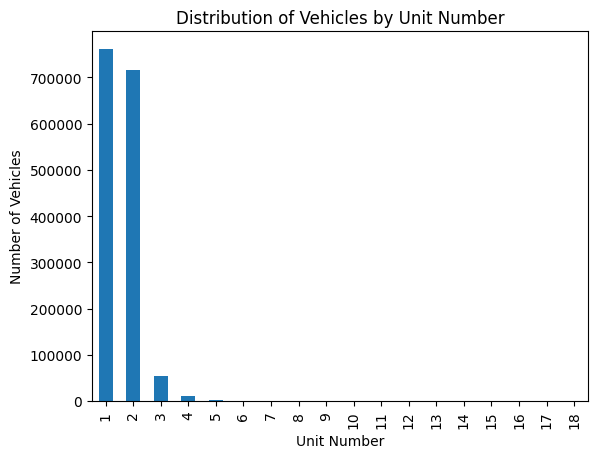

In [40]:
# UNIT_NO distribution
vehicles['UNIT_NO'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Unit Number')
plt.xlabel('Unit Number')
plt.ylabel('Number of Vehicles')
plt.show()


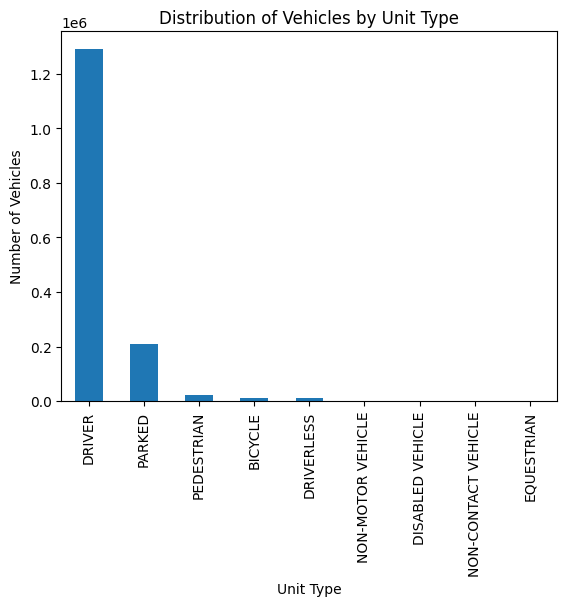

In [41]:
vehicles['UNIT_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Unit Type')
plt.xlabel('Unit Type')
plt.ylabel('Number of Vehicles')
plt.show()


In [42]:
vehicles = vehicles[vehicles['UNIT_TYPE'] == 'DRIVER']


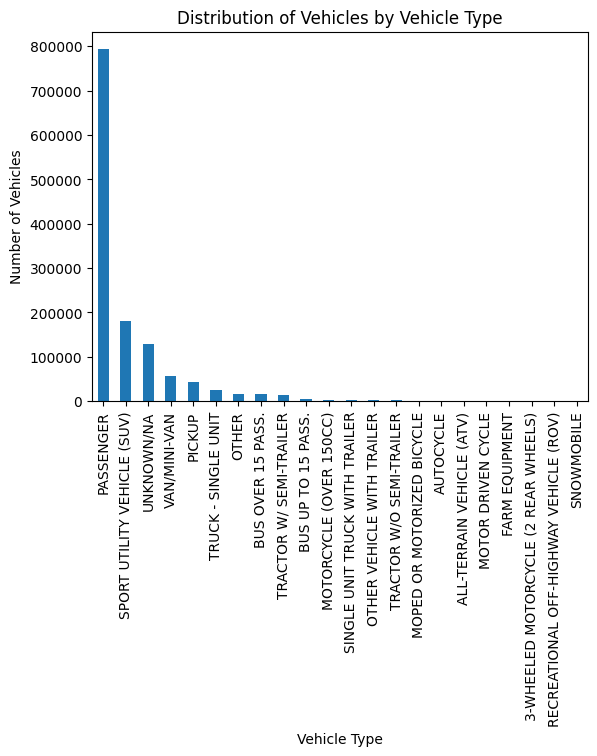

In [43]:
vehicles['VEHICLE_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.show()

In [44]:
vehicles['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
PASSENGER                                 793333
SPORT UTILITY VEHICLE (SUV)               180727
UNKNOWN/NA                                128422
VAN/MINI-VAN                               57448
PICKUP                                     43227
TRUCK - SINGLE UNIT                        25501
OTHER                                      16322
BUS OVER 15 PASS.                          16220
TRACTOR W/ SEMI-TRAILER                    13552
BUS UP TO 15 PASS.                          4140
MOTORCYCLE (OVER 150CC)                     3321
SINGLE UNIT TRUCK WITH TRAILER              2792
OTHER VEHICLE WITH TRAILER                  1791
TRACTOR W/O SEMI-TRAILER                    1674
MOPED OR MOTORIZED BICYCLE                   595
AUTOCYCLE                                    340
ALL-TERRAIN VEHICLE (ATV)                    144
MOTOR DRIVEN CYCLE                           136
FARM EQUIPMENT                                68
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          55
RECREAT

In [45]:
vehicle_categories = {
    "PASSENGER": "Passenger Vehicle",
    "SPORT UTILITY VEHICLE (SUV)": "Passenger Vehicle",
    "VAN/MINI-VAN": "Passenger Vehicle",
    "PICKUP": "Passenger Vehicle",
    
    "TRUCK - SINGLE UNIT": "Truck/Commercial",
    "SINGLE UNIT TRUCK WITH TRAILER": "Truck/Commercial",
    "TRACTOR W/ SEMI-TRAILER": "Truck/Commercial",
    "TRACTOR W/O SEMI-TRAILER": "Truck/Commercial",
    "OTHER VEHICLE WITH TRAILER": "Truck/Commercial",

    "BUS OVER 15 PASS.": "Public Transport",
    "BUS UP TO 15 PASS.": "Public Transport",

    "MOTORCYCLE (OVER 150CC)": "Motorcycle",
    "MOTOR DRIVEN CYCLE": "Motorcycle",
    "MOPED OR MOTORIZED BICYCLE": "Motorcycle",
    "AUTOCYCLE": "Motorcycle",
    "3-WHEELED MOTORCYCLE (2 REAR WHEELS)": "Motorcycle",

    "ALL-TERRAIN VEHICLE (ATV)": "Off-Road/Specialized",
    "RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)": "Off-Road/Specialized",
    "SNOWMOBILE": "Off-Road/Specialized",
    "FARM EQUIPMENT": "Off-Road/Specialized",

    "UNKNOWN/NA": "Unknown/Other",
    "OTHER": "Unknown/Other"
}

vehicles["CATEGORY"] = vehicles["VEHICLE_TYPE"].map(vehicle_categories)


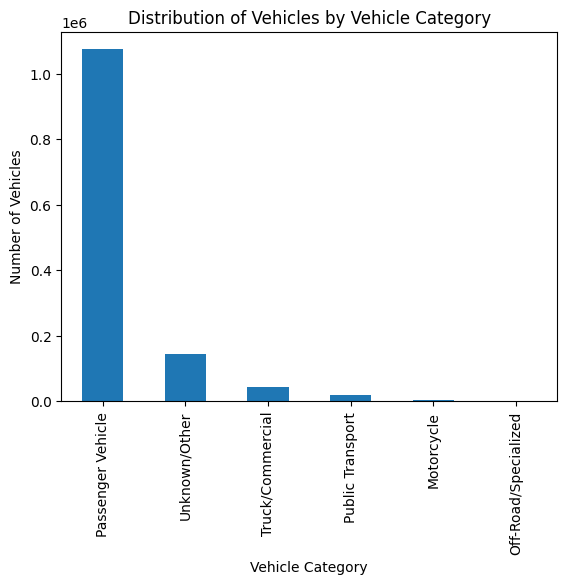

In [46]:
vehicles['CATEGORY'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Number of Vehicles')
plt.show()


In [47]:
vehicles = vehicles[vehicles['CATEGORY'] != 'Unknown/Other']

In [48]:
# save the cleaned datasets

crashes.to_csv('dataset/crashes_cleaned.csv', index=False)
people.to_csv('dataset/people_cleaned.csv', index=False)
vehicles.to_csv('dataset/vehicles_cleaned.csv', index=False)

---

## dropping the missing values

In [49]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757867 entries, 0 to 757866
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   757867 non-null  object        
 1   CRASH_DATE                        757867 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                757867 non-null  int64         
 3   WEATHER_SEVERITY                  757867 non-null  int64         
 4   LIGHTING_SEVERITY                 757867 non-null  int64         
 5   FIRST_CRASH_TYPE                  757867 non-null  object        
 6   TRAFFICWAY_TYPE                   757867 non-null  object        
 7   ROADWAY_SEVERITY                  757867 non-null  int64         
 8   CRASH_TYPE                        757867 non-null  object        
 9   DAMAGE_SEVERITY                   757867 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE         

In [50]:
crashes = crashes.dropna()

In [51]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754809 entries, 0 to 757866
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   754809 non-null  object        
 1   CRASH_DATE                        754809 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                754809 non-null  int64         
 3   WEATHER_SEVERITY                  754809 non-null  int64         
 4   LIGHTING_SEVERITY                 754809 non-null  int64         
 5   FIRST_CRASH_TYPE                  754809 non-null  object        
 6   TRAFFICWAY_TYPE                   754809 non-null  object        
 7   ROADWAY_SEVERITY                  754809 non-null  int64         
 8   CRASH_TYPE                        754809 non-null  object        
 9   DAMAGE_SEVERITY                   754809 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE           754

In [52]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290542 entries, 0 to 1290541
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1290542 non-null  object 
 1   PERSON_TYPE            1290542 non-null  object 
 2   CRASH_RECORD_ID        1290542 non-null  object 
 3   VEHICLE_ID             1289907 non-null  float64
 4   CRASH_DATE             1290542 non-null  object 
 5   CITY                   974592 non-null   object 
 6   STATE                  963462 non-null   object 
 7   ZIPCODE                913353 non-null   object 
 8   SEX                    1290542 non-null  float64
 9   AGE                    933194 non-null   float64
 10  DRIVERS_LICENSE_STATE  970287 non-null   object 
 11  DRIVERS_LICENSE_CLASS  793192 non-null   object 
 12  INJURY_CLASSIFICATION  1290542 non-null  object 
 13  DRIVER_ACTION          1290542 non-null  object 
 14  DRIVER_VISION     

In [53]:
# Compute the mean age for each sex
age_by_sex = people.groupby("SEX")["AGE"].median()
print(age_by_sex)


SEX
-1.0    36.0
 0.0    36.0
 1.0    39.0
Name: AGE, dtype: float64


In [54]:
# Map values
sex_mapping = {-1: "Other", 0: "Female", 1: "Male"}
people["SEX"] = people["SEX"].map(sex_mapping)

# Verify mapping
print(people["SEX"].unique()) 


['Male' 'Female' 'Other']


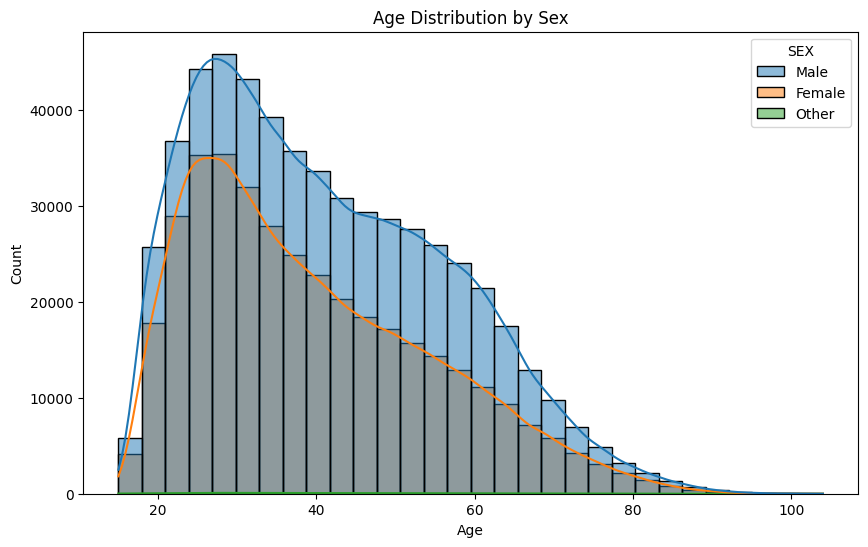

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(data=people, x="AGE", hue="SEX", bins=30, kde=True, alpha=0.5)

# Labels
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Sex")

# Show plot
plt.show()

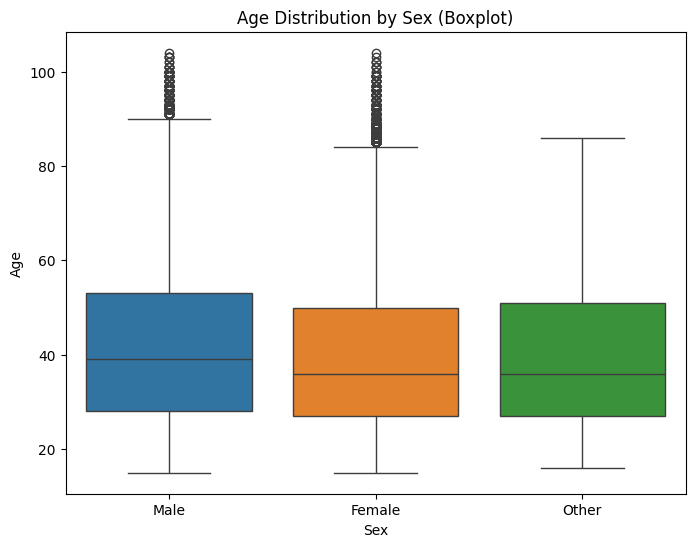

In [56]:
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(data=people, x="SEX", y="AGE", hue="SEX")

# Labels
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Age Distribution by Sex (Boxplot)")

plt.show()


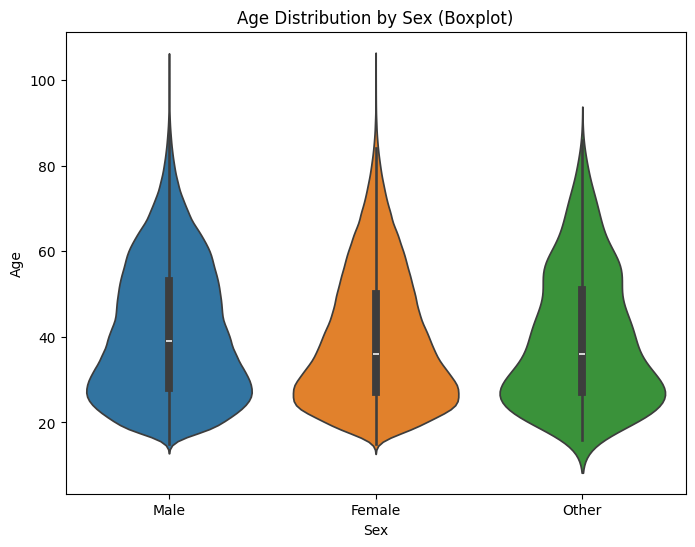

In [57]:
plt.figure(figsize=(8, 6))

# Boxplot
sns.violinplot(data=people, x="SEX", y="AGE", hue='SEX')

# Labels
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Age Distribution by Sex (Boxplot)")

plt.show()


In [58]:
people["GENDER_UNKNOWN"] = (people["SEX"] == -1).astype(int)
people["GENDER_FEMALE"] = (people["SEX"] == 0).astype(int)
people["GENDER_MALE"] = (people["SEX"] == 1).astype(int)


## Neo-patented-drivers and senior-drivers


In [59]:
people["neo_patented_drivers"] = (people["AGE"] <= 21).astype(int)
people["senior_drivers"] = (people["AGE"] >= 65).astype(int)

In [60]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290542 entries, 0 to 1290541
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1290542 non-null  object 
 1   PERSON_TYPE            1290542 non-null  object 
 2   CRASH_RECORD_ID        1290542 non-null  object 
 3   VEHICLE_ID             1289907 non-null  float64
 4   CRASH_DATE             1290542 non-null  object 
 5   CITY                   974592 non-null   object 
 6   STATE                  963462 non-null   object 
 7   ZIPCODE                913353 non-null   object 
 8   SEX                    1290542 non-null  object 
 9   AGE                    933194 non-null   float64
 10  DRIVERS_LICENSE_STATE  970287 non-null   object 
 11  DRIVERS_LICENSE_CLASS  793192 non-null   object 
 12  INJURY_CLASSIFICATION  1290542 non-null  object 
 13  DRIVER_ACTION          1290542 non-null  object 
 14  DRIVER_VISION     

--- 

# Merging Crashes and People

In [61]:
# Aggregate people data per crash, making sure to count only non-null ages
people_grouped = people.groupby('CRASH_RECORD_ID').agg(
    GENDER_UNKNOWN=('GENDER_UNKNOWN', 'sum'),
    GENDER_FEMALE=('GENDER_FEMALE', 'sum'),
    GENDER_MALE=('GENDER_MALE', 'sum'),
    AGE_MEAN=('AGE', 'mean'),
    AGE_SUM=('AGE', 'sum'),
    AGE_COUNT=('AGE', 'count'),  # This counts only non-null values
    TOTAL_PEOPLE=('PERSON_ID', 'count'),
    SUM_PEOPLE=('PERSON_ID', 'count'),
    neo_patented_drivers=('neo_patented_drivers', 'sum'),
    senior_drivers=('senior_drivers', 'sum'),
    speeding=('SPEEDING', 'sum'),
    drinking=('DRINKING', 'sum'),
    telephone=('TELEPHONE', 'sum'),
    ejected_airbag=('EJECTION/AIRBAG', 'sum'),
).reset_index()

# Merge the aggregated people data with crashes data
crashes = pd.merge(crashes, people_grouped, on='CRASH_RECORD_ID', how='left')


crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754809 entries, 0 to 754808
Data columns (total 72 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   754809 non-null  object        
 1   CRASH_DATE                        754809 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                754809 non-null  int64         
 3   WEATHER_SEVERITY                  754809 non-null  int64         
 4   LIGHTING_SEVERITY                 754809 non-null  int64         
 5   FIRST_CRASH_TYPE                  754809 non-null  object        
 6   TRAFFICWAY_TYPE                   754809 non-null  object        
 7   ROADWAY_SEVERITY                  754809 non-null  int64         
 8   CRASH_TYPE                        754809 non-null  object        
 9   DAMAGE_SEVERITY                   754809 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE         

In [64]:
# check difference  TOTAL_PEOPLE SUM_PEOPLE
crashes[crashes['TOTAL_PEOPLE'] != crashes['SUM_PEOPLE']].dropna()[['TOTAL_PEOPLE', 'SUM_PEOPLE']].head()


,TOTAL_PEOPLE,SUM_PEOPLE


In [418]:
print(crashes['SPEEDING'].value_counts())
print(crashes['DRINKING'].value_counts())
print(crashes['TELEPHONE'].value_counts())

SPEEDING
0    682009
1     72800
Name: count, dtype: int64
DRINKING
0    742928
1     11881
Name: count, dtype: int64
TELEPHONE
0    753872
1       937
Name: count, dtype: int64


In [417]:
# change SPEEDING, DRINKING, TELEPHONE to 0 or 1
crashes['SPEEDING'] = crashes['SPEEDING'].astype(int)
crashes['DRINKING'] = crashes['DRINKING'].astype(int)
crashes['TELEPHONE'] = crashes['TELEPHONE'].astype(int)

In [419]:
# speeding becomes 1 if at least SPEEDING or speeding is 1
crashes['SPEEDING'] = (crashes['SPEEDING'] + crashes['speeding'])
crashes['DEINKING'] = (crashes['DRINKING'] + crashes['drinking'])
crashes['TELEPHONE'] = (crashes['TELEPHONE'] + crashes['telephone'])

In [420]:
# change back to 1 if the value is greater than 1
crashes['SPEEDING'] = (crashes['SPEEDING'] > 0).astype(int)
crashes['DRINKING'] = (crashes['DRINKING'] > 0).astype(int)
crashes['TELEPHONE'] = (crashes['TELEPHONE'] > 0).astype(int)

In [421]:
print(crashes['SPEEDING'].value_counts())
print(crashes['DRINKING'].value_counts())
print(crashes['TELEPHONE'].value_counts())

SPEEDING
0    672141
1     82668
Name: count, dtype: int64
DRINKING
0    742928
1     11881
Name: count, dtype: int64
TELEPHONE
0    752125
1      2684
Name: count, dtype: int64


In [422]:
#percentage of missing values   
crashes.isnull().mean() * 100

CRASH_RECORD_ID       0.000000
CRASH_DATE            0.000000
POSTED_SPEED_LIMIT    0.000000
WEATHER_SEVERITY      0.000000
LIGHTING_SEVERITY     0.000000
                        ...   
speeding              0.169579
drinking              0.169579
telephone             0.169579
ejected_airbag        0.169579
DEINKING              0.169579
Length: 72, dtype: float64

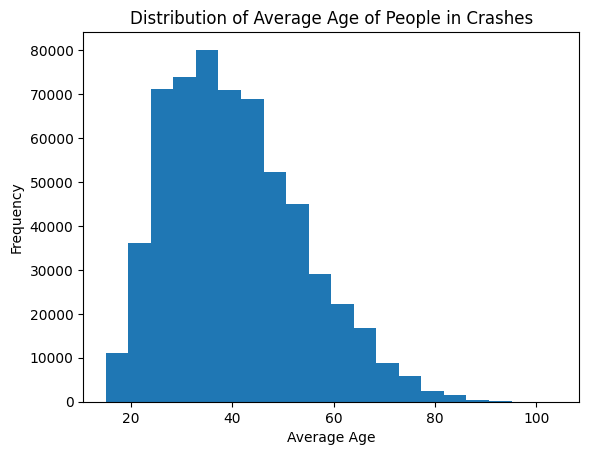

In [423]:
# average age distribution
crashes['AGE_MEAN'].plot(kind='hist', bins=20)
plt.title('Distribution of Average Age of People in Crashes')
plt.xlabel('Average Age')

plt.show()

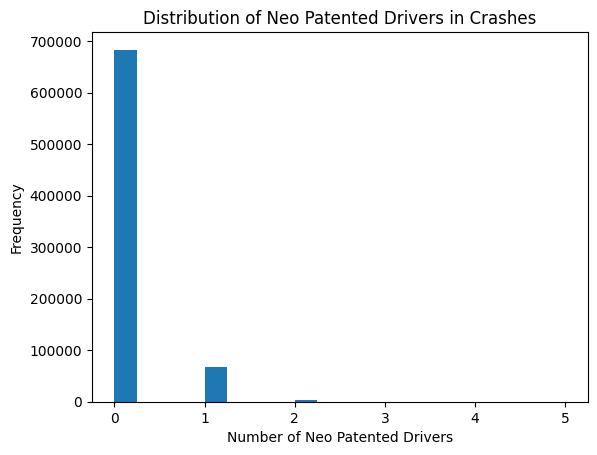

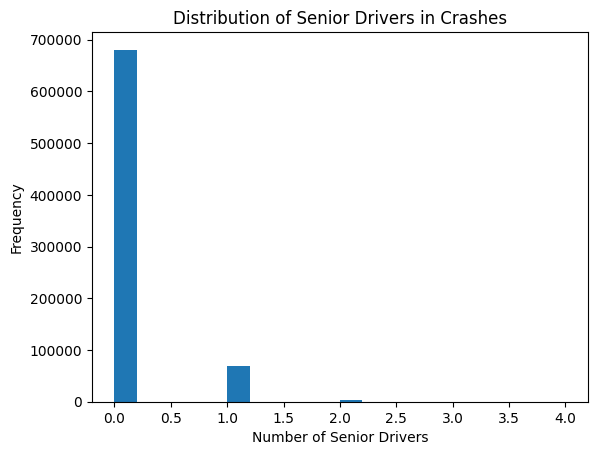

In [424]:
# plot neo patented drivers and senior drivers distribution
crashes['neo_patented_drivers'].plot(kind='hist', bins=20)
plt.title('Distribution of Neo Patented Drivers in Crashes')
plt.xlabel('Number of Neo Patented Drivers')
plt.show()

crashes['senior_drivers'].plot(kind='hist', bins=20)
plt.title('Distribution of Senior Drivers in Crashes')
plt.xlabel('Number of Senior Drivers')
plt.show()


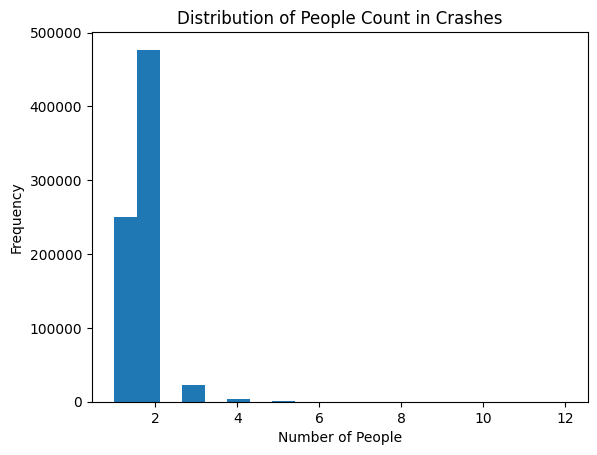

In [425]:
# people count distribution
crashes['TOTAL_PEOPLE'].plot(kind='hist', bins=20)
plt.title('Distribution of People Count in Crashes')
plt.xlabel('Number of People')
plt.show()


In [426]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145725 entries, 0 to 1549469
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1145725 non-null  int64  
 1   CRASH_RECORD_ID      1145725 non-null  object 
 2   VEHICLE_ID           1145090 non-null  float64
 3   CRASH_DATE           1145725 non-null  object 
 4   UNIT_NO              1145725 non-null  int64  
 5   UNIT_TYPE            1145725 non-null  object 
 6   NUM_PASSENGERS       206636 non-null   float64
 7   VEHICLE_YEAR         1021321 non-null  float64
 8   VEHICLE_DEFECT       1145090 non-null  object 
 9   VEHICLE_TYPE         1145090 non-null  object 
 10  MANEUVER             1145090 non-null  object 
 11  OCCUPANT_CNT         1145090 non-null  float64
 12  FIRST_CONTACT_POINT  1142837 non-null  object 
 13  CATEGORY             1145090 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 131.1+

In [427]:
# 1 column for each vehicle category
vehicles = pd.get_dummies(vehicles, columns=['CATEGORY'])

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145725 entries, 0 to 1549469
Data columns (total 18 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_UNIT_ID                  1145725 non-null  int64  
 1   CRASH_RECORD_ID                1145725 non-null  object 
 2   VEHICLE_ID                     1145090 non-null  float64
 3   CRASH_DATE                     1145725 non-null  object 
 4   UNIT_NO                        1145725 non-null  int64  
 5   UNIT_TYPE                      1145725 non-null  object 
 6   NUM_PASSENGERS                 206636 non-null   float64
 7   VEHICLE_YEAR                   1021321 non-null  float64
 8   VEHICLE_DEFECT                 1145090 non-null  object 
 9   VEHICLE_TYPE                   1145090 non-null  object 
 10  MANEUVER                       1145090 non-null  object 
 11  OCCUPANT_CNT                   1145090 non-null  float64
 12  FIRST_CONTACT_POINT

In [428]:
# MERGE THE VEHICLES DATASET WITH THE CRASHES DATASET, SUMMING THE CATEGORY COLUMNS and only adding the category columns
vehicles_grouped = vehicles.groupby('CRASH_RECORD_ID').sum().reset_index()
columns = ['CRASH_RECORD_ID', 'CATEGORY_Motorcycle', 'CATEGORY_Off-Road/Specialized', 'CATEGORY_Passenger Vehicle', 'CATEGORY_Public Transport', 'CATEGORY_Truck/Commercial']

vehicles_grouped = vehicles_grouped[columns]

crashes = pd.merge(crashes, vehicles_grouped, on='CRASH_RECORD_ID', how='left')


In [429]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754809 entries, 0 to 754808
Data columns (total 77 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   754809 non-null  object        
 1   CRASH_DATE                        754809 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                754809 non-null  int64         
 3   WEATHER_SEVERITY                  754809 non-null  int64         
 4   LIGHTING_SEVERITY                 754809 non-null  int64         
 5   FIRST_CRASH_TYPE                  754809 non-null  object        
 6   TRAFFICWAY_TYPE                   754809 non-null  object        
 7   ROADWAY_SEVERITY                  754809 non-null  int64         
 8   CRASH_TYPE                        754809 non-null  object        
 9   DAMAGE_SEVERITY                   754809 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE         

In [430]:
crashes_no_na = crashes.dropna()

In [431]:
crashes_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586598 entries, 1 to 754808
Data columns (total 77 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   586598 non-null  object        
 1   CRASH_DATE                        586598 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                586598 non-null  int64         
 3   WEATHER_SEVERITY                  586598 non-null  int64         
 4   LIGHTING_SEVERITY                 586598 non-null  int64         
 5   FIRST_CRASH_TYPE                  586598 non-null  object        
 6   TRAFFICWAY_TYPE                   586598 non-null  object        
 7   ROADWAY_SEVERITY                  586598 non-null  int64         
 8   CRASH_TYPE                        586598 non-null  object        
 9   DAMAGE_SEVERITY                   586598 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE           586

In [432]:
# save the cleaned datasets
crashes.to_csv('dataset/crashes_cleaned.csv', index=False)
crashes_no_na.to_csv('dataset/crashes_cleaned_no_na.csv', index=False)
people.to_csv('dataset/people_cleaned.csv', index=False)
vehicles.to_csv('dataset/vehicles_cleaned.csv', index=False)

---

# creation of crash profile

In [433]:
# load crashes
crashes = pd.read_csv('dataset/crashes_cleaned.csv')

In [434]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754809 entries, 0 to 754808
Data columns (total 77 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   754809 non-null  object 
 1   CRASH_DATE                        754809 non-null  object 
 2   POSTED_SPEED_LIMIT                754809 non-null  int64  
 3   WEATHER_SEVERITY                  754809 non-null  int64  
 4   LIGHTING_SEVERITY                 754809 non-null  int64  
 5   FIRST_CRASH_TYPE                  754809 non-null  object 
 6   TRAFFICWAY_TYPE                   754809 non-null  object 
 7   ROADWAY_SEVERITY                  754809 non-null  int64  
 8   CRASH_TYPE                        754809 non-null  object 
 9   DAMAGE_SEVERITY                   754809 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           754809 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            754809 non-null  o

## PRIM CAUSE OF THE INCIDENT

<Axes: xlabel='PRIM_CONTRIBUTORY_CAUSE'>

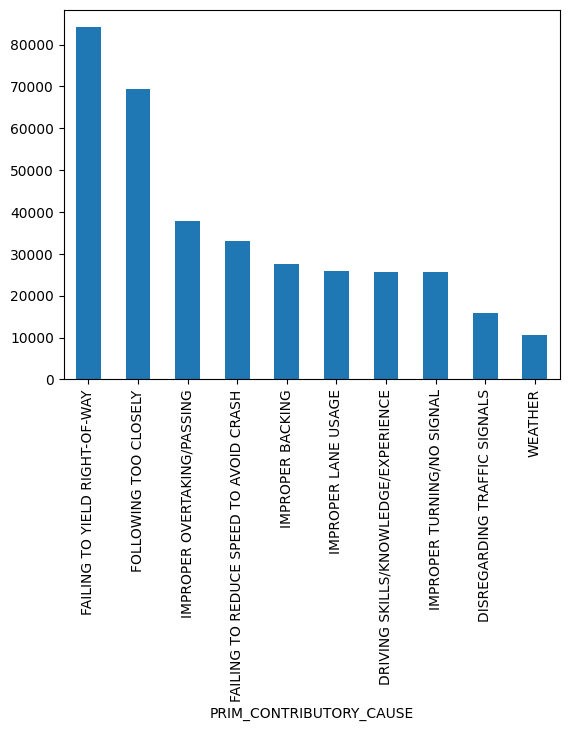

In [435]:
## PRIM CAUSE OF THE INCIDENT
crashesPlot = crashes[crashes['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
crashesPlot = crashesPlot[crashesPlot['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']
crashesPlot['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='SEC_CONTRIBUTORY_CAUSE'>

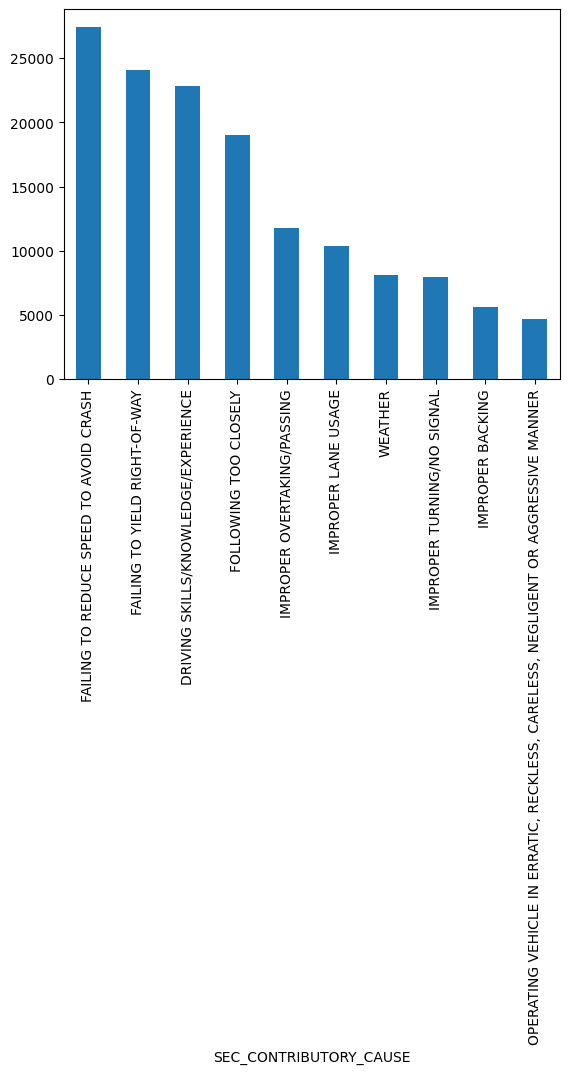

In [436]:
crashesPlot = crashes[crashes['SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
crashesPlot = crashesPlot[crashesPlot['SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']
crashesPlot['SEC_CONTRIBUTORY_CAUSE'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='PRIM_CONTRIBUTORY_CAUSE'>

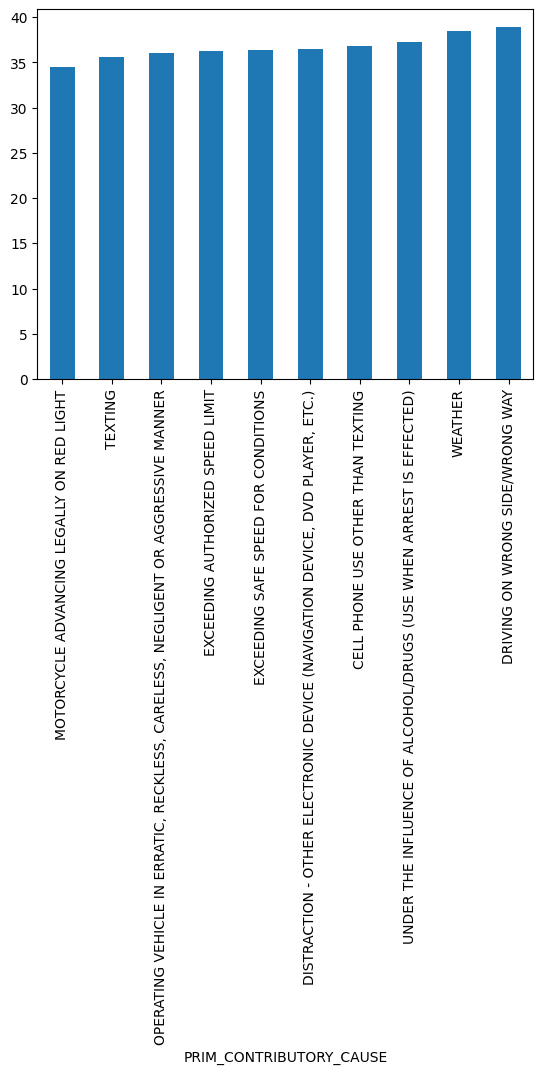

In [437]:
crashesPlot = crashes[crashes['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
crashesPlot = crashesPlot[crashesPlot['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']
crashesPlot.groupby('PRIM_CONTRIBUTORY_CAUSE')["AGE_MEAN"].mean().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: xlabel='PRIM_CONTRIBUTORY_CAUSE'>

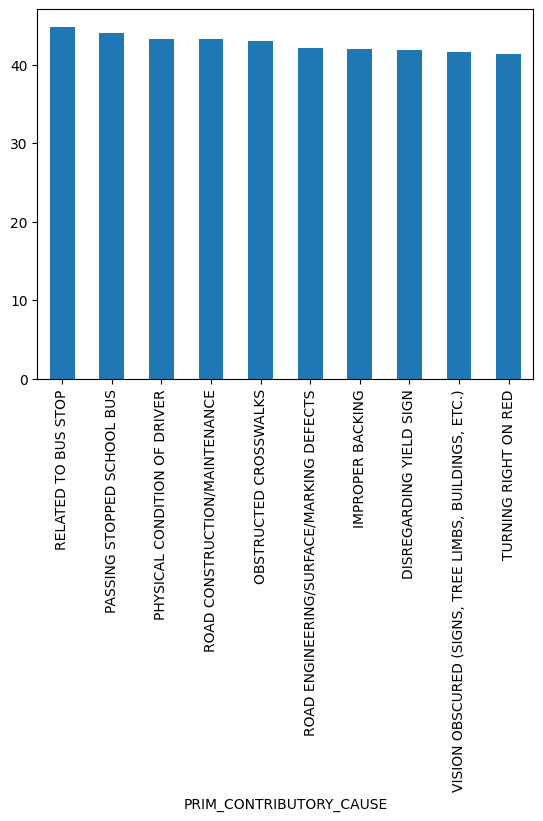

In [438]:
crashesPlot = crashes[crashes['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
crashesPlot = crashesPlot[crashesPlot['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']
crashesPlot.groupby('PRIM_CONTRIBUTORY_CAUSE')["AGE_MEAN"].mean().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='SEC_CONTRIBUTORY_CAUSE'>

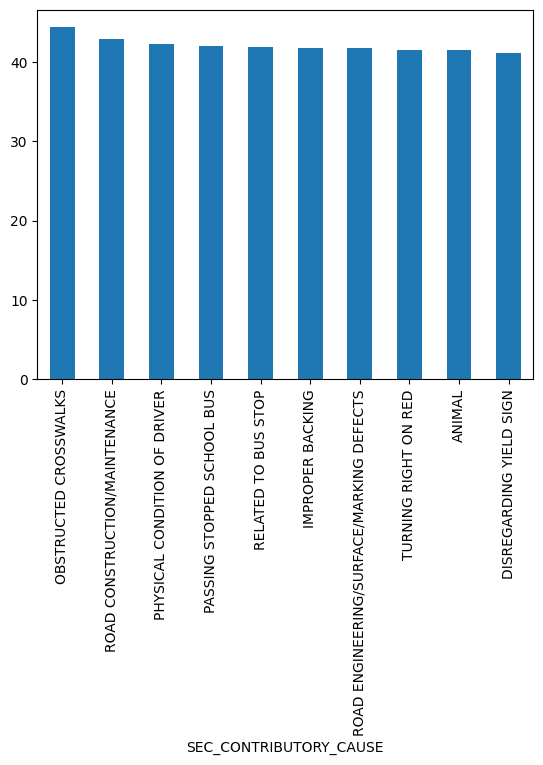

In [439]:
crashesPlot = crashes[crashes['SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
crashesPlot = crashesPlot[crashesPlot['SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']
crashesPlot.groupby('SEC_CONTRIBUTORY_CAUSE')["AGE_MEAN"].mean().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='SEC_CONTRIBUTORY_CAUSE'>

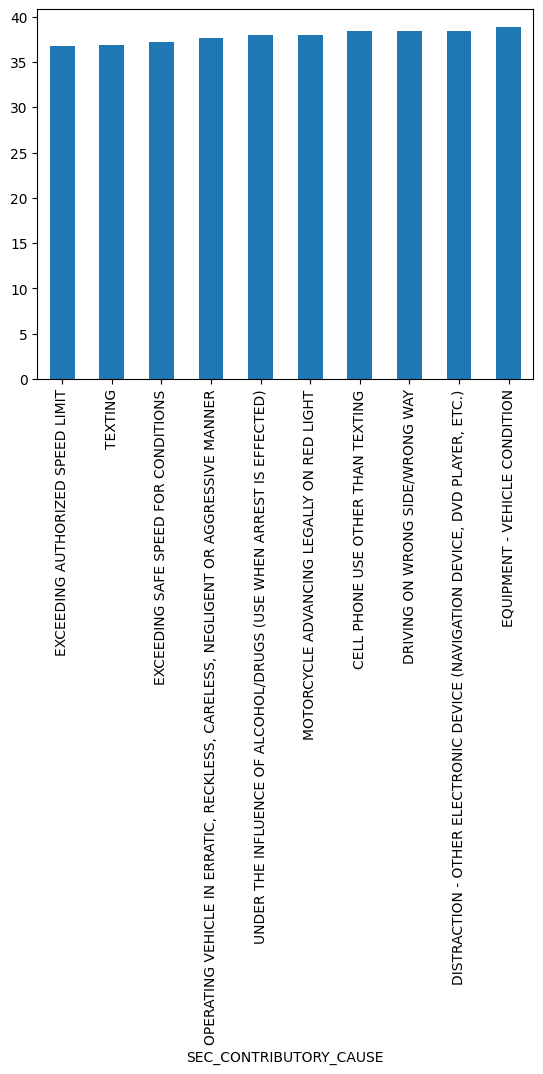

In [440]:

crashesPlot = crashes[crashes['SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
crashesPlot = crashesPlot[crashesPlot['SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']
crashesPlot.groupby('SEC_CONTRIBUTORY_CAUSE')["AGE_MEAN"].mean().sort_values(ascending=True).head(10).plot(kind='bar')

## Creation of Profile

In [441]:
# Ensure proper data types
crashes["CRASH_YEAR"] = crashes["CRASH_YEAR"].astype(int)
crashes["CRASH_MONTH"] = crashes["CRASH_MONTH"].astype(int)
crashes["BEAT_OF_OCCURRENCE"] = crashes["BEAT_OF_OCCURRENCE"].astype(float)
crashes["AGE_MEAN"] = pd.to_numeric(crashes["AGE_MEAN"], errors="coerce")

# Identify all categorical columns dynamically (all starting with 'CATEGORY_', 'LIGHTING_CATEGORY_', 'ROADWAY_SURFACE_CATEGORY_', etc.)
categorical_columns = [col for col in crashes.columns if col.startswith(
    ("GENDER_","INJURIES_", "CATEGORY_", "WEATHER_CATEGORY_", "LIGHTING_CATEGORY_", "ROADWAY_SURFACE_CATEGORY_", "ROAD_DEFECT_CATEGORY_", "DAMAGE_CATEGORY_"))]
crashes[categorical_columns] = crashes[categorical_columns].apply(pd.to_numeric, errors="coerce")

# Grouping by year, month, and police department
incident_profile = crashes.groupby(["CRASH_YEAR", "CRASH_MONTH", "BEAT_OF_OCCURRENCE"]).agg(
    avg_age=("AGE_MEAN", "mean"),
    avg_speed_limit=("POSTED_SPEED_LIMIT", "mean"),
    total_crashes=("CRASH_RECORD_ID", "count"),
    **{f"sum_{col.lower()}": (col, "sum") for col in categorical_columns}
).reset_index()


# Display the first few rows
incident_profile.head()


,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_age,avg_speed_limit,total_crashes,sum_injuries_total,sum_injuries_fatal,sum_injuries_incapacitating,sum_injuries_non_incapacitating,sum_injuries_reported_not_evident,sum_weather_category_clear,sum_weather_category_cloudy,sum_weather_category_rain,sum_weather_category_extreme,sum_weather_category_unknown,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_gender_unknown,sum_gender_female,sum_gender_male,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial
0,2018,1,111.0,42.585366,30.108696,46,8.0,0.0,1.0,3.0,4.0,33,0,4,6,3,25,20,1,31,12,1,0,2,38,0,3,0,5,31,5,10,0.0,0.0,0.0,0.0,0.0,62.0,5.0,7.0
1,2018,1,112.0,44.586207,29.393939,33,3.0,0.0,0.0,1.0,2.0,31,1,0,1,0,24,9,0,29,4,0,0,0,31,0,1,0,1,16,8,9,0.0,0.0,0.0,0.0,0.0,48.0,2.0,5.0
2,2018,1,113.0,39.368421,29.285714,21,1.0,0.0,0.0,1.0,0.0,18,0,0,2,1,12,9,0,16,2,3,0,0,18,0,1,0,2,8,5,8,0.0,0.0,0.0,0.0,0.0,30.0,2.0,2.0
3,2018,1,114.0,40.028736,32.812500,96,24.0,0.0,0.0,15.0,9.0,76,1,5,10,4,59,36,1,63,16,8,3,6,81,1,2,1,11,68,15,13,0.0,0.0,0.0,0.0,0.0,167.0,8.0,2.0
4,2018,1,121.0,43.418367,29.237288,59,7.0,0.0,0.0,7.0,0.0,45,2,4,6,2,40,18,1,38,10,8,0,3,51,0,0,0,8,30,15,14,0.0,0.0,0.0,0.0,0.0,93.0,5.0,3.0


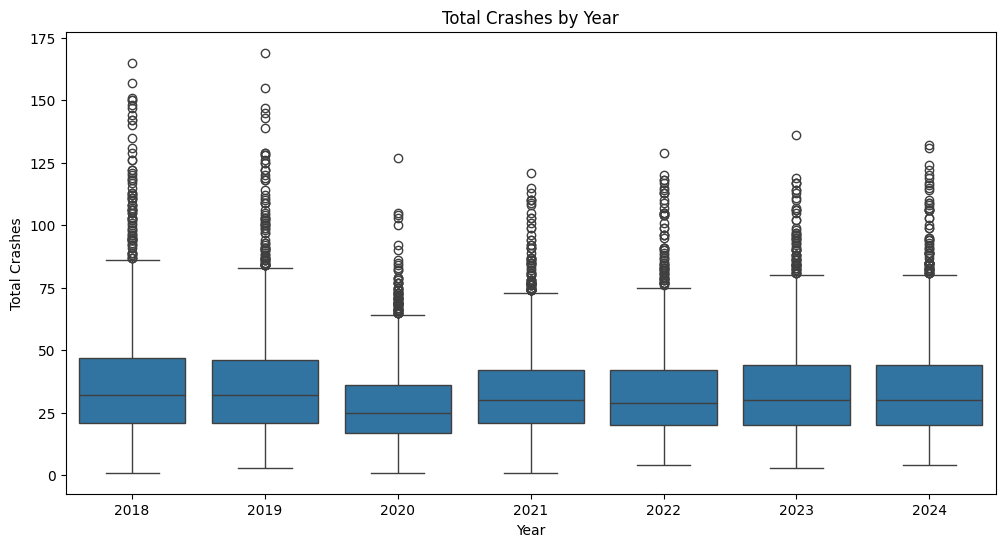

In [442]:
#box plot total_crashes
plt.figure(figsize=(12, 6))
sns.boxplot(data=incident_profile, x="CRASH_YEAR", y="total_crashes")
plt.title("Total Crashes by Year")
plt.xlabel("Year")
plt.ylabel("Total Crashes")
plt.show()


In [443]:
#group by department
department_profile = crashes.groupby(["BEAT_OF_OCCURRENCE"]).agg(
    avg_age=("AGE_MEAN", "mean"),
    avg_speed_limit=("POSTED_SPEED_LIMIT", "mean"),
    total_crashes=("CRASH_RECORD_ID", "count"),
    **{f"sum_{col.lower()}": (col, "sum") for col in categorical_columns}
).reset_index()

In [444]:
department_profile.head()

,BEAT_OF_OCCURRENCE,avg_age,avg_speed_limit,total_crashes,sum_injuries_total,sum_injuries_fatal,sum_injuries_incapacitating,sum_injuries_non_incapacitating,sum_injuries_reported_not_evident,sum_weather_category_clear,sum_weather_category_cloudy,sum_weather_category_rain,sum_weather_category_extreme,sum_weather_category_unknown,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_gender_unknown,sum_gender_female,sum_gender_male,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial
0,111.0,41.042572,29.013505,3036,524.0,4.0,61.0,309.0,150.0,2480,64,241,67,184,1831,1060,145,2395,349,45,8,239,2475,4,15,3,539,1865,425,746,0.0,0.0,0.0,23.0,0.0,4480.0,234.0,214.0
1,112.0,42.193967,29.454191,2052,290.0,1.0,36.0,167.0,86.0,1644,56,176,47,129,1385,564,103,1560,254,47,3,188,1647,4,6,10,385,1146,365,541,0.0,0.0,0.0,13.0,0.0,2882.0,302.0,200.0
2,113.0,40.795821,29.354154,1649,321.0,1.0,43.0,167.0,110.0,1307,31,149,41,121,1055,500,94,1242,208,37,2,160,1339,0,7,6,297,1011,247,391,0.0,0.0,0.0,11.0,0.0,2387.0,166.0,129.0
3,114.0,40.152614,32.380921,7516,1535.0,8.0,184.0,850.0,493.0,6048,197,606,174,491,4624,2551,341,5713,939,118,17,729,5911,84,40,45,1436,4801,834,1881,0.0,0.0,0.0,62.0,1.0,12429.0,411.0,323.0
4,121.0,41.113425,29.434515,3245,531.0,0.0,58.0,309.0,164.0,2573,91,293,97,191,2215,882,148,2449,440,90,7,259,2610,5,11,14,605,1965,444,836,0.0,0.0,0.0,16.0,1.0,4883.0,254.0,210.0


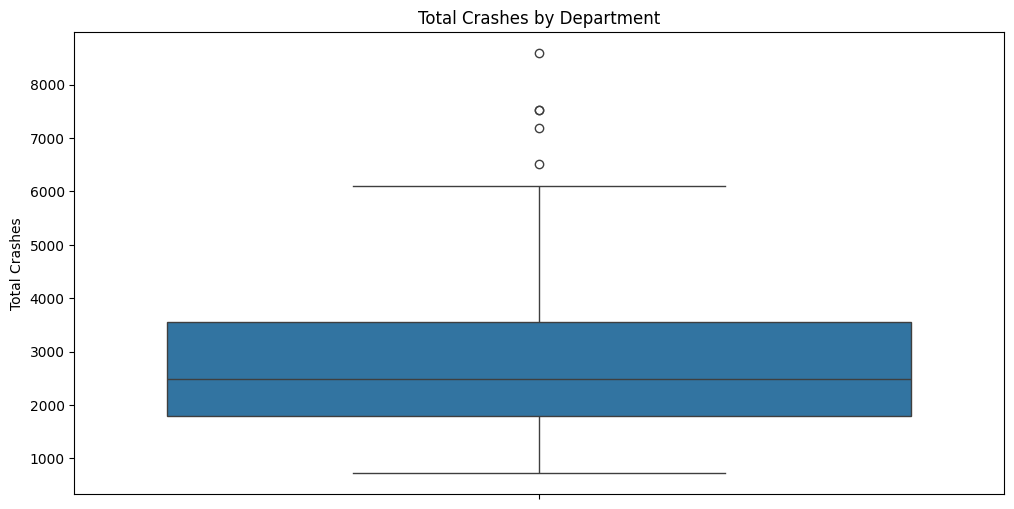

In [445]:
#box plot total_crashes
plt.figure(figsize=(12, 6))
sns.boxplot(data=department_profile, y="total_crashes")
plt.title("Total Crashes by Department")
plt.ylabel("Total Crashes")
plt.show()


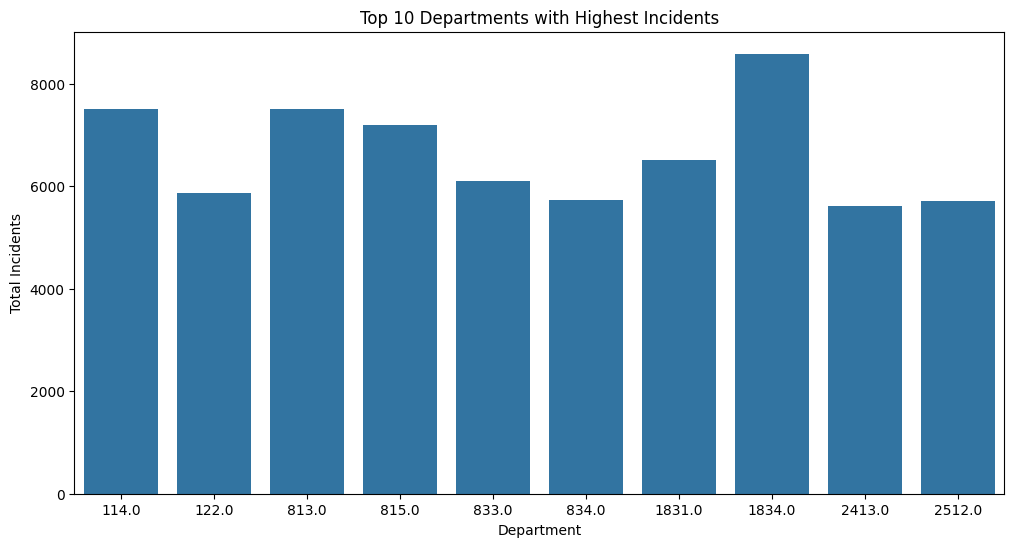

In [446]:
plt.figure(figsize=(12, 6))
sns.barplot(data=department_profile.sort_values("total_crashes", ascending=False).head(10), x="BEAT_OF_OCCURRENCE", y="total_crashes")
plt.title("Top 10 Departments with Highest Incidents")
plt.xlabel("Department")
plt.ylabel("Total Incidents")
plt.show()


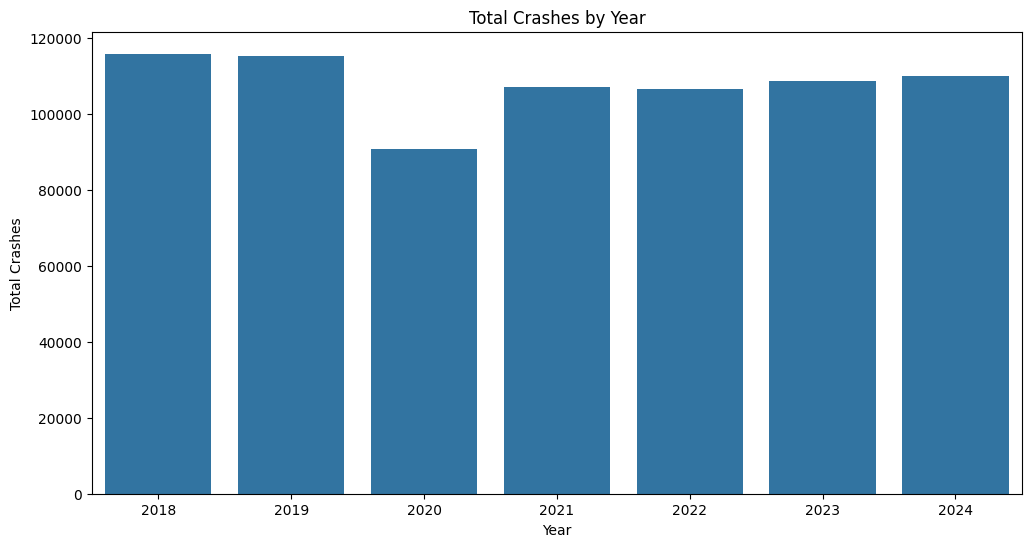

In [447]:
# years with more crashes
plt.figure(figsize=(12, 6))
sns.barplot(data=incident_profile.groupby("CRASH_YEAR")["total_crashes"].sum().reset_index(), x="CRASH_YEAR", y="total_crashes")
plt.title("Total Crashes by Year")
plt.xlabel("Year")
plt.ylabel("Total Crashes")
plt.show()
